In [3]:
import numpy as np
import matplotlib.pyplot as plt

Open cable wavelength: 9.9927 +- 0.06 cm
Shorted cable wavelength: 10.00363 +- 0.06 cm

Open cable Chisq: 4.29090
Shorted cable Chisq: 6.072


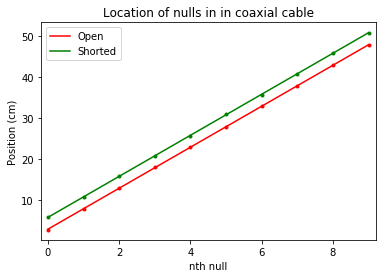

In [4]:
#%matplotlib notebook

end_open = np.array([2.9, 8.0, 13.0, 18.1, 22.9, 27.9, 32.9, 38.0, 43.0, 47.9])
end_shorted = np.array([5.9, 10.8, 15.9, 20.9, 25.8, 31.0, 35.7, 40.9, 45.9, 50.9]) 

end_open_arange = np.arange(len(end_open))
end_shorted_arange = np.arange(len(end_shorted))

open_linreg = np.polyfit(end_open_arange, end_open, deg=1)
shorted_linreg = np.polyfit(end_shorted_arange, end_shorted, deg=1)


plt.errorbar(end_open_arange, end_open,yerr=0.1,fmt='r.')
plt.plot(end_open_arange, np.polyval(open_linreg, end_open_arange),'r',label='Open')

plt.errorbar(end_shorted_arange, end_shorted,yerr=0.1,fmt='g.')
plt.plot(end_shorted_arange, np.polyval(shorted_linreg, end_shorted_arange),'g',label='Shorted')
plt.xlim(-0.2,9.2)
plt.title('Location of nulls in in coaxial cable')
plt.legend()
plt.xlabel('nth null')
plt.ylabel('Position (cm)')

open_chisq = np.sum((end_open - np.polyval(open_linreg, end_open_arange))**2/0.1**2)
shorted_chisq = np.sum((end_shorted - np.polyval(shorted_linreg, end_shorted_arange))**2/0.1**2)

print("Open cable wavelength: "+ str(open_linreg[0]*2)[:-10] +' +- 0.06'+ ' cm')
print("Shorted cable wavelength: "+ str(shorted_linreg[0]*2)[:-10]+' +- 0.06'+ ' cm')
print("")
print("Open cable Chisq: "+ str(open_chisq)[:-10])
print("Shorted cable Chisq: "+ str(shorted_chisq)[:-10])

Chi-square for light-speed measurements: 0.04747351


(5, 12)

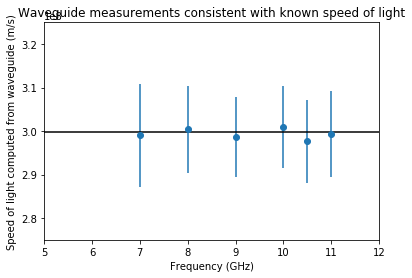

In [5]:
wg_9o = np.array([16.5, 14.1, 11.7, 9.4])                                                                                                                                      
wg_9s = np.array([17.4, 14.9, 12.5, 10.1])                                                                                                                                     
wg_7s = np.array([16.6, 10.3])                                                                                                                                                 
wg_11s = np.array([16.6, 14.9, 13.3, 11.6, 9.8, 8.1])                                                                                                                          
wg_10s = np.array([17.0, 15.1, 13.0, 11.0, 9.0])                                                                                                                               
wg_8s = np.array([18.0, 14.6, 11.2, 8.0])                                                                                                                                      
wg_10_5s = np.array([17.6, 15.8, 14.0, 12.2, 10.4, 8.5])                                                                                                                       

fs_wavelength = lambda nu_ghz: 299792458e-9/nu_ghz                                                                                                                             
arrs_wg = [wg_7s, wg_8s, wg_9s, wg_10s, wg_10_5s, wg_11s]
arrs_freqs = np.array([7,8,9,10,10.5, 11])
width_wg = 2.27e-2
width_wg_err = 1e-3
width_lambda_err = 1e-3
c_light_true = 299792458

lambda_sls = []                                                                                                                                                                

for q in range(len(arrs_freqs)): 
    lambda_sl = np.abs(np.polyfit(np.arange(len(arrs_wg[q])), arrs_wg[q],deg=1)[0]) * 2/100; 
    lambda_sls.append(lambda_sl) 
    lambda_fs = fs_wavelength(arrs_freqs[q]) 
     
    wav_mod = lambda_sl**2 * lambda_fs**2/(lambda_sl**2 - lambda_fs**2) 

lambda_sls = np.array(lambda_sls)
c_light = ((lambda_sls * arrs_freqs * 1e9)**2/(lambda_sls**2/(4 * width_wg**2) + 1))**0.5
c_light_err_width = ((lambda_sls * arrs_freqs * 1e9)**2/(lambda_sls**2/(4 * (width_wg + width_wg_err)**2) + 1))**0.5 - c_light
c_light_err_nulls = (((lambda_sls+0.001) * arrs_freqs * 1e9)**2/(lambda_sls**2/(4 * (width_wg)**2) + 1))**0.5 - c_light

c_light_err_tot = (c_light_err_width**2 + c_light_err_nulls**2)**0.5
c_light_chisq = np.sum((c_light - c_light_true)**2/(2 * c_light_err_tot**2))

print("Chi-square for light-speed measurements: " + str(c_light_chisq)[:-10])

plt.errorbar(arrs_freqs, c_light, yerr=c_light_err_tot, fmt='o')

plt.xlabel('Frequency (GHz)')
plt.ylabel('Speed of light computed from waveguide (m/s)')
plt.title('Waveguide measurements consistent with known speed of light')
plt.plot([5,12], [299792458,299792458], c='black')
plt.ylim(2.75e8, 3.25e8)
plt.xlim(5,12)

![title](threeplot.png)